In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading

data = pd.read_csv("/content/AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.shape

(144, 2)

In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data["Month"] = pd.to_datetime(data["Month"])

In [7]:
data = data.set_index(["Month"])

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

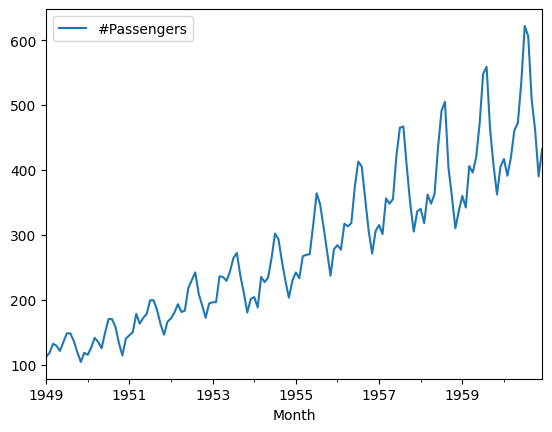

In [10]:
data.plot()

In [11]:
#lets check if the data is stationary or not

In [12]:
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(data)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,0.8153688792060498
p-value=0.991880243437641
n_lags,13
The series is not stationary


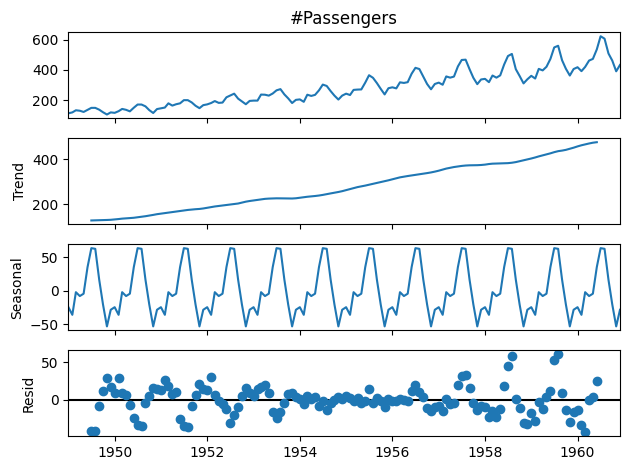

In [13]:
#sesonal decompose: It plots the components of the time series data separately.

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data["#Passengers"])
decomposition.plot();

ROLLING STATISTICS:

Rolling statistics is a very useful operation for time series data. Rolling mean creats a rolling window with a specified size and perform calculation on the data in this window which ofcourse rolls through the data.




Rolling stats also helps us to plot the mean and the standard deviation

In [14]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

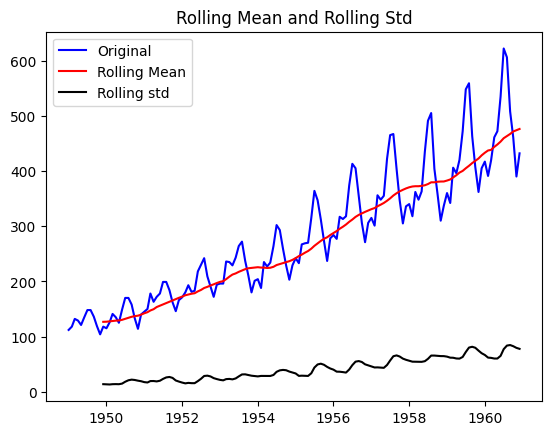

In [15]:
plt.plot(data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time.
For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

In [16]:
# TRANSFORMATIONS

first_log = np.log(data)

In [17]:
first_log = first_log.dropna()

In [18]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

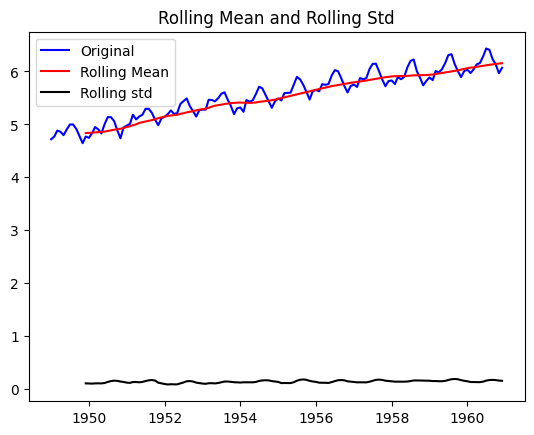

In [19]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [20]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


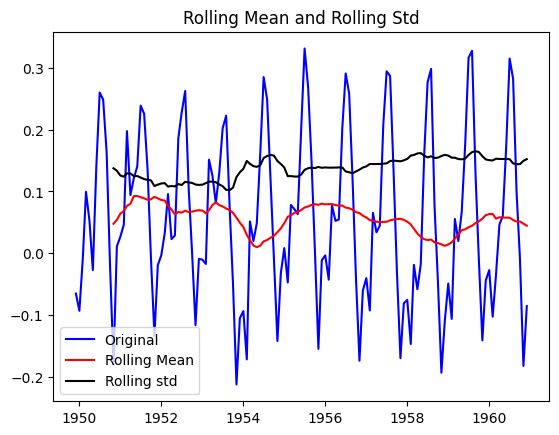

In [21]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [22]:
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.1629079913008833
p-value=0.022234630001242206
n_lags,13
series is stationary


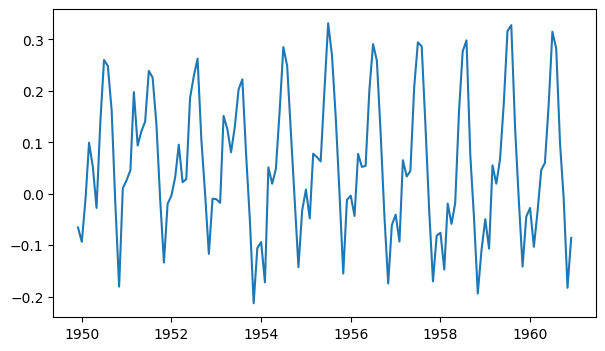

In [23]:
fig= plt.subplots(figsize=(7,4))
plt.plot(new_data);

In [24]:
# MODEL BUILDING

In [25]:
# ARIMA MODEL :  p(PACF),d,q(ACF)

In [26]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [27]:
acf_plot = acf(new_data.dropna())   #gradual decrease and previous point to that    =--------> q(2)

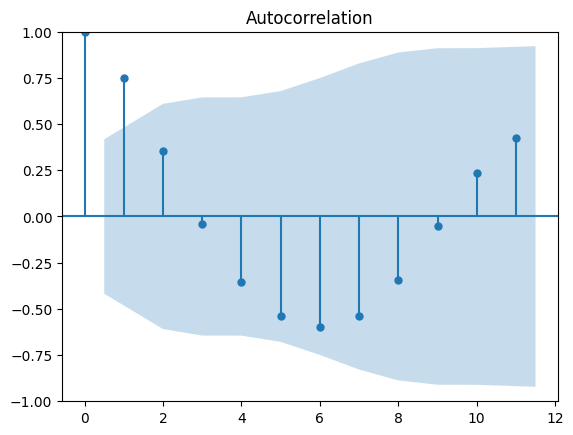

In [28]:
plot_acf(acf_plot);

In [29]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [30]:
pacf_plot=pacf(new_data.dropna())

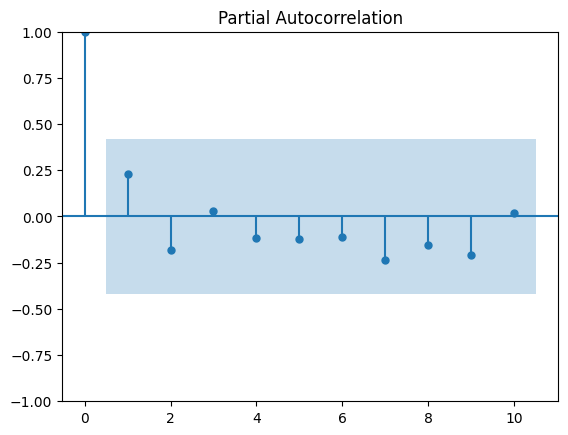

In [31]:
plot_pacf(pacf_plot,lags=10);

In [32]:
train = new_data.iloc[:120]
test = new_data[121:]

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model = ARIMA(train,order=(1,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

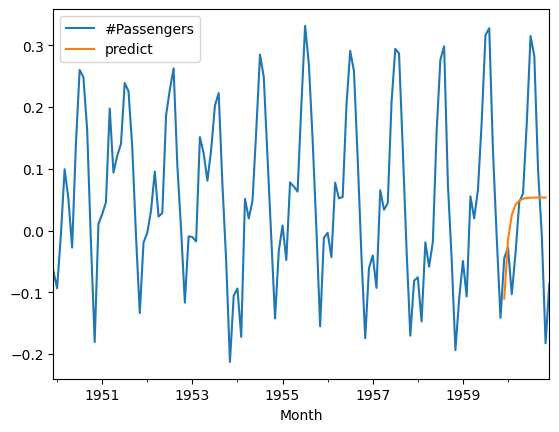

In [35]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Month'>

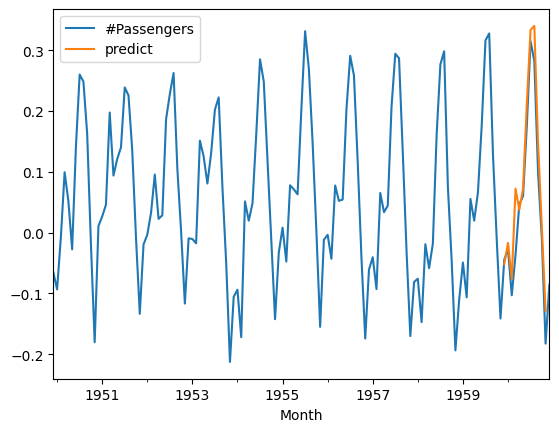

In [38]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

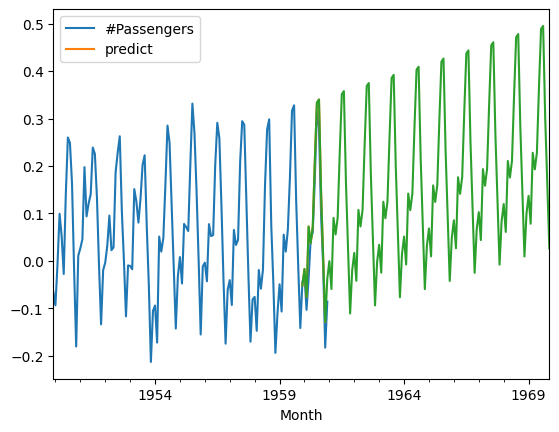

In [39]:
forecast = model.forecast(steps=120) #for predicting furture
new_data.plot()
forecast.plot()

In [40]:
## How to find the ideal values for p,d,q:

import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values



128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,RMSE
"(5, 1, 7)",0.084174
"(6, 0, 0)",0.087669
"(6, 1, 1)",0.087859
"(4, 0, 6)",0.088317
"(7, 1, 2)",0.089486
...,...
"(2, 1, 0)",0.225544
"(0, 1, 0)",0.236146
"(1, 1, 1)",0.247916
"(0, 1, 1)",0.260413


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

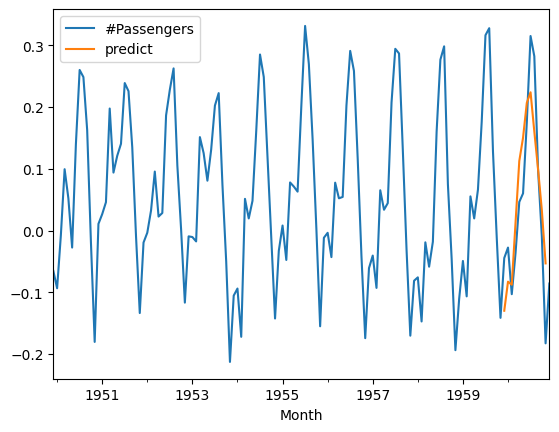

In [41]:
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(4,1,6)) #(4,1,6) - least rmse
model_fit=model.fit()

new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [42]:
model=SARIMAX(train,order=(4,1,6),seasonal_order=(4,1,6,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

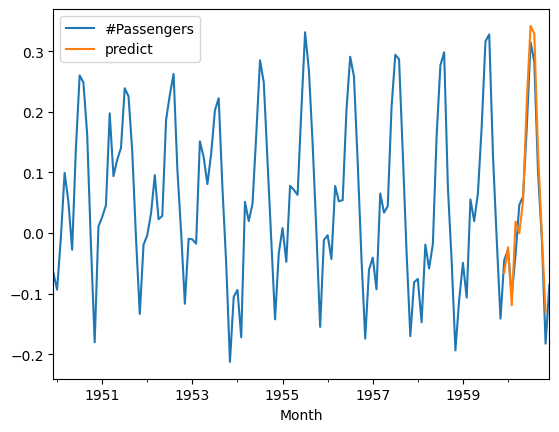

In [43]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

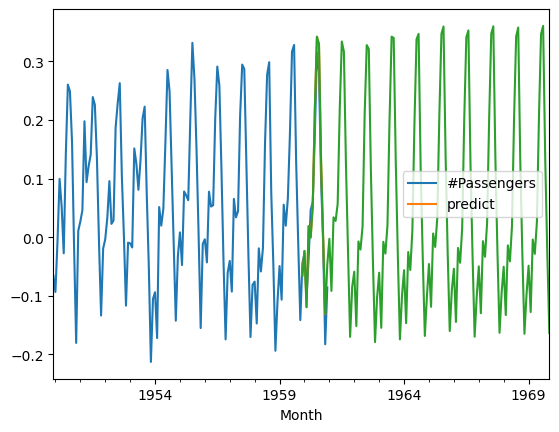

In [44]:
forecast = model.forecast(steps=120) #for predicting furture
new_data.plot()
forecast.plot()